Задача проверки гипотезы Гольдбаха для всех нечетных чисел до огромного числа, как указано в нашем запросе, действительно нереализуема с помощью современных вычислительных методов. Даже с учетом современной техники, проверка такого количества чисел на соответствие гипотезе Гольдбаха потребует невероятно большого количества времени и ресурсов. Однако мы можем создать программу, которая иллюстрирует процесс проверки гипотезы для более малых чисел и анимирует этот процесс.

Подход, который мы можем использовать, заключается в следующем:

1. Сгенерировать список простых чисел до определенного предела.
2. Перебрать нечетные числа в заданном диапазоне.
3. Для каждого нечетного числа проверить, можно ли его представить как сумму трех простых чисел.
4. Визуализировать результаты проверки.

# **Пример кода на Python:**

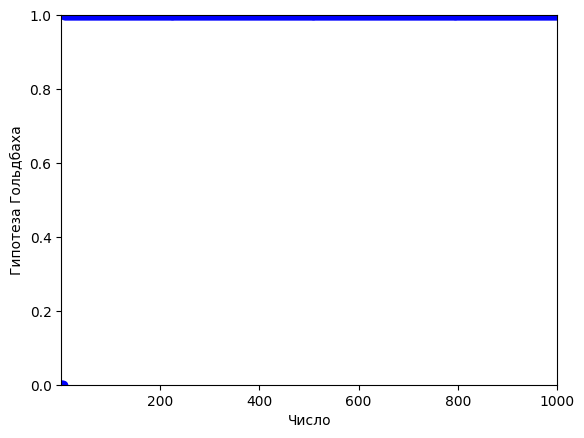

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import primerange
from itertools import combinations_with_replacement
from IPython.display import HTML

# Генерация простых чисел
def generate_primes(n):
    return list(primerange(1, n))

# Проверка гипотезы Гольдбаха
def goldbach_conjecture(n, primes):
    for comb in combinations_with_replacement(primes, 3):
        if sum(comb) == n:
            return True
    return False

# Настройки анимации
limit = 1000  # Ограничение для проверки
primes = generate_primes(limit)
results = np.empty((0, 2))  # Результаты проверки в форме двумерного массива

# Создание фигуры для анимации
fig, ax = plt.subplots()
ax.set_xlim(1, limit)
ax.set_ylim(0, 1)
ax.set_xlabel("Число")
ax.set_ylabel("Гипотеза Гольдбаха")
scat = ax.scatter([], [], c='blue')

# Инициализация анимации
def init():
    scat.set_offsets(np.empty((0, 2)))
    return (scat,)

# Функция анимации
def animate(i):
    if i % 2 != 0:  # Проверяем только нечетные числа
        result = goldbach_conjecture(i, primes)
        new_result = np.array([[i, int(result)]])  # Добавляем результат как двумерный массив
        global results
        results = np.append(results, new_result, axis=0)
    scat.set_offsets(results)
    return (scat,)

# Создание анимации
ani = animation.FuncAnimation(fig, animate, frames=limit, init_func=init, blit=True, repeat=False)

# Отображение анимации
HTML(ani.to_html5_video())


Этот код создаст анимацию, в которой каждый кадр проверяет одно нечетное число на соответствие гипотезе Гольдбаха. Если число удовлетворяет гипотезе, оно отображается на графике.

Однако, имейте в виду, что этот код работает только для малых чисел и служит лишь иллюстрацией метода проверки гипотезы, а не ее полной проверкой до огромного числа, упомянутого в вашем запросе.